In [1]:
# !pip install umap
# !pip install umap-learn
# !pip install nb_black
# !pip install plotly

In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap

from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage

from prince import MCA, FAMD

import plotly.express as px
from ipywidgets import interact

import ast

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
spotify = pd.read_excel("data/Hot_100_Audio_Features.xlsx")
spotify.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,...,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,0.0,215733.0,88.0,...,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,NaN,Hollywood's Bleeding,1.0,196760.0,86.0,...,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,1.0,228185.0,61.0,...,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


<IPython.core.display.Javascript object>

In [5]:
spotify = spotify.drop_duplicates()

<IPython.core.display.Javascript object>

In [6]:
spotify = spotify.drop(
    columns=[
        "spotify_track_id",
        "spotify_track_preview_url",
    ]
)

<IPython.core.display.Javascript object>

In [7]:
spotify.shape

(28470, 20)

<IPython.core.display.Javascript object>

In [8]:
spotify.head()

,SongID,Performer,Song,spotify_genre,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,0.734,0.836,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",A Star Is Born Soundtrack,0.0,215733.0,88.0,0.572,0.385,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",Hollywood's Bleeding,1.0,196760.0,86.0,0.542,0.674,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",Bacc At It Again,1.0,228185.0,61.0,0.948,0.623,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


<IPython.core.display.Javascript object>

In [9]:
spotify.dtypes

SongID                        object
Performer                     object
Song                          object
spotify_genre                 object
spotify_track_album           object
spotify_track_explicit       float64
spotify_track_duration_ms    float64
spotify_track_popularity     float64
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
dtype: object

<IPython.core.display.Javascript object>

In [10]:
spotify.isna().mean()

SongID                       0.000000
Performer                    0.000000
Song                         0.000000
spotify_genre                0.043133
spotify_track_album          0.166737
spotify_track_explicit       0.166526
spotify_track_duration_ms    0.166526
spotify_track_popularity     0.166526
danceability                 0.168739
energy                       0.168739
key                          0.168739
loudness                     0.168739
mode                         0.168739
speechiness                  0.168739
acousticness                 0.168739
instrumentalness             0.168739
liveness                     0.168739
valence                      0.168739
tempo                        0.168739
time_signature               0.168739
dtype: float64

<IPython.core.display.Javascript object>

# Fill null values

In [11]:
spotify["spotify_track_album"].fillna(" ", inplace=True)
spotify["spotify_genre"].fillna("[]", inplace=True)

# Reformat the genre list
spotify["spotify_genre_list"] = spotify["spotify_genre"].apply(ast.literal_eval)

<IPython.core.display.Javascript object>

In [12]:
spotify.rename(
    columns={
        "spotify_genre": "genre_str",
        "spotify_genre_list": "genre_list",
        "spotify_track_album": "album",
        "spotify_track_explicit": "explicit",
    },
    inplace=True,
)

<IPython.core.display.Javascript object>

In [13]:
# Try to change all columns to numeric
# if theres an error, ignore it and move to next column
spotify = spotify.apply(pd.to_numeric, errors="ignore")

<IPython.core.display.Javascript object>

In [14]:
spotify["explicit"].fillna("Not filled", inplace=True)

# Fill N/As with mean values
null_cols = [
    "spotify_track_duration_ms",
    "spotify_track_popularity",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]

for col in null_cols:
    spotify[col].fillna(spotify[col].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [15]:
spotify["genre_str"].value_counts().head(30)

[]                                                                                                      3769
['contemporary country', 'country', 'country road']                                                      314
['contemporary country', 'country', 'country road', 'modern country rock']                               279
['dance pop', 'pop', 'post-teen pop']                                                                    251
['glee club', 'hollywood', 'post-teen pop']                                                              205
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']                         138
['deep adult standards']                                                                                 129
['adult standards', 'easy listening', 'lounge']                                                          128
['bubblegum pop']                                                                                        127
['freestyle']      

<IPython.core.display.Javascript object>

In [16]:
# The genre list order matters because the later genres override the eariler ones
# For example, if a song has both 'pop' and 'hip hop', the resulting genre would be 'hip hop'
# I did this because a large number of songs are in the 'pop' genre
genre_list = [
    "pop",
    "rock",
    "hip hop",
    "blues",
    "metal",
    "country",
    "disco",
    "jazz",
    "classical",
]

for genre in genre_list:
    spotify[genre] = spotify["genre_str"].str.contains(fr"\b{genre}\b")
    spotify.loc[spotify[genre], "genre_label"] = genre

spotify = spotify.drop(columns=genre_list)

<IPython.core.display.Javascript object>

In [17]:
spotify["genre_label"].value_counts()

rock         6044
pop          4317
country      3155
hip hop      2747
disco        1519
blues        1480
jazz         1178
metal         826
classical      43
Name: genre_label, dtype: int64

<IPython.core.display.Javascript object>

In [23]:
spotify = spotify[~spotify["genre_label"].isna()]

<IPython.core.display.Javascript object>

In [105]:
spotify.describe()

,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2.130900e+04,21309.000000,21309.000000,21309.000000,21309.000000,21309.000000,21309.000000,21309.000000,21309.000000,21309.000000,21309.000000,21309.000000,21309.000000,21309.000000
mean,2.234674e+05,43.105597,0.597433,0.625797,5.220980,-8.524885,0.731515,0.071862,0.281639,0.025862,0.192137,0.599719,120.569629,3.936387
std,6.096863e+04,20.148951,0.144801,0.188808,3.387771,3.412636,0.422246,0.075953,0.262125,0.109516,0.150935,0.226942,26.735431,0.297915
min,2.968800e+04,0.000000,0.000000,0.020400,0.000000,-28.030000,0.000000,0.000000,0.000003,0.000000,0.009670,0.000000,0.000000,0.000000
25%,1.848400e+05,29.000000,0.511000,0.503000,2.000000,-10.554000,0.729612,0.032600,0.051800,0.000000,0.094700,0.437000,101.227000,4.000000
50%,2.213909e+05,42.000000,0.598255,0.618042,5.239584,-8.523000,1.000000,0.043900,0.224000,0.000010,0.144000,0.605261,120.199492,4.000000
75%,2.507730e+05,58.000000,0.692000,0.771000,8.000000,-5.931000,1.000000,0.071769,0.433000,0.002030,0.231000,0.779000,134.303000,4.000000
max,1.561133e+06,100.000000,0.986000,0.996000,11.000000,0.175000,1.000000,0.894000,0.989000,0.981000,0.999000,0.990000,216.200000,5.000000


<IPython.core.display.Javascript object>

In [25]:
spotify[["Performer", "genre_list"]]

,Performer,genre_list
0,"Tainy, Anuel AA & Ozuna",[pop reggaeton]
1,Justin Moore,"[arkansas country, contemporary country, count..."
2,Lady Gaga & Bradley Cooper,"[dance pop, pop]"
4,"Yella Beezy, Gucci Mane & Quavo","[dfw rap, rap, southern hip hop, trap]"
5,Taylor Swift,"[dance pop, pop, post-teen pop]"
...,...,...
28486,Genesis,"[album rock, art rock, classic rock, mellow go..."
28487,The Smashing Pumpkins,"[alternative metal, alternative rock, grunge, ..."
28488,Rod Stewart,"[adult standards, mellow gold, soft rock]"
28489,BLACKstreet,"[boy band, dance pop, hip hop, hip pop, neo so..."


<IPython.core.display.Javascript object>

In [26]:
# Isolate numbers
nums_spot = spotify.select_dtypes("number")

<IPython.core.display.Javascript object>

In [27]:
model_df = spotify.drop(
    columns=[
        "SongID",
        "Performer",
        "Song",
        "genre_str",
        "album",
        "genre_list",
        "explicit",
        "spotify_track_duration_ms",
        "spotify_track_popularity",
    ]
)

model_df = model_df.dropna()
model_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_label
0,0.734000,0.836000,10.000000,-4.803000,0.000000,0.073500,0.017000,0.000016,0.179000,0.623000,80.002000,4.000000,pop
1,0.598255,0.618042,5.239584,-8.714603,0.729612,0.071769,0.296133,0.033268,0.192624,0.605261,120.199492,3.930745,country
2,0.572000,0.385000,7.000000,-6.362000,1.000000,0.030800,0.371000,0.000000,0.231000,0.323000,95.799000,4.000000,pop
4,0.948000,0.623000,8.000000,-5.725000,0.000000,0.168000,0.001240,0.000001,0.071600,0.856000,135.979000,4.000000,hip hop
5,0.292000,0.574000,0.000000,-9.375000,1.000000,0.040100,0.120000,0.005690,0.066300,0.166000,124.344000,4.000000,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28486,0.571000,0.502000,7.000000,-14.405000,1.000000,0.030300,0.015800,0.014000,0.084900,0.316000,98.058000,4.000000,rock
28487,0.287000,0.670000,6.000000,-9.381000,1.000000,0.036800,0.000063,0.748000,0.237000,0.222000,148.928000,4.000000,metal
28488,0.550000,0.514000,11.000000,-12.617000,1.000000,0.052300,0.336000,0.125000,0.382000,0.724000,136.542000,3.000000,rock
28489,0.585000,0.573000,6.000000,-5.561000,0.000000,0.075900,0.133000,0.000011,0.173000,0.591000,76.060000,4.000000,hip hop


<IPython.core.display.Javascript object>

In [28]:
model_df["genre_label"] = model_df["genre_label"].astype("category").cat.codes
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21309 entries, 0 to 28491
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      21309 non-null  float64
 1   energy            21309 non-null  float64
 2   key               21309 non-null  float64
 3   loudness          21309 non-null  float64
 4   mode              21309 non-null  float64
 5   speechiness       21309 non-null  float64
 6   acousticness      21309 non-null  float64
 7   instrumentalness  21309 non-null  float64
 8   liveness          21309 non-null  float64
 9   valence           21309 non-null  float64
 10  tempo             21309 non-null  float64
 11  time_signature    21309 non-null  float64
 12  genre_label       21309 non-null  int8   
dtypes: float64(12), int8(1)
memory usage: 2.1 MB


<IPython.core.display.Javascript object>

In [96]:
@interact
def scatterplot(x=nums_spot.columns, y=nums_spot.columns, hue="genre_label"):
    colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
    fig = px.scatter(
        x=x,
        y=y,
        color=hue,
        data_frame=spotify.dropna(),
        labels={
            "spotify_track_duration_ms": "Track length (seconds)",
            "danceability": "Danceability",
            "genre_label": "Genre",
            "speechiness": "Speechiness",
            "energy": "Energy",
        },
    )
    fig.update_layout(
        font=dict(
            family="Arial, monospace",
            size=18,
        )
    )
    fig.show()

interactive(children=(Dropdown(description='x', options=('spotify_track_duration_ms', 'spotify_track_popularit…

<IPython.core.display.Javascript object>

# Graph interpretations


In [104]:
@interact
def boxplot(y=nums_spot.columns, hue=["genre_label"]):
    plt.figure(figsize=(8, 5))
    fig = px.box(
        x="genre_label",
        y=y,
        color=hue,
        data_frame=spotify.dropna(),
        labels={
            "danceability": "Danceability",
            "genre_label": "Genre",
            "speechiness": "Speechiness",
            "energy": "Energy",
            "spotify_track_popularity": "Popularity",
        },
    )
    fig.update_layout(
        font=dict(
            family="Arial, monospace",
            size=18,
        )
    )
    fig.show()

interactive(children=(Dropdown(description='y', options=('spotify_track_duration_ms', 'spotify_track_popularit…

<IPython.core.display.Javascript object>

# K-means analysis, 10000 rows

In [35]:
samp = model_df.sample(10000, axis=0, random_state=66)
samp_spot = spotify.sample(10000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]

<IPython.core.display.Javascript object>

In [38]:
samp_spot.index

Int64Index([ 7807, 27120, 20971, 11238, 21086, 18955,  7937, 26318, 13120,
             2042,
            ...
             7197, 20647,  7140,  9805,  3539, 27455, 16265,  5628,    11,
            18209],
           dtype='int64', length=10000)

<IPython.core.display.Javascript object>

In [32]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

Clusters (k) = 2
Silhouette score: 0.09910454249227973, ARI score: 0.010761184038025983


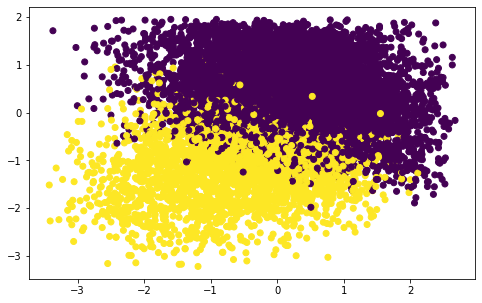

Clusters (k) = 3
Silhouette score: 0.0039850513800426075, ARI score: 0.018407148695659258


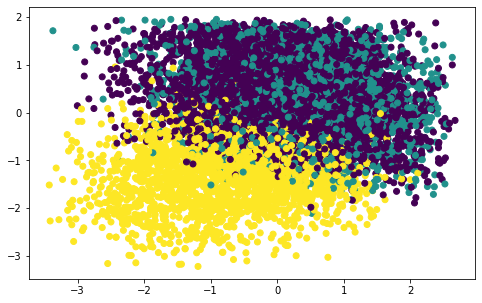

Clusters (k) = 4
Silhouette score: -0.048693694603704325, ARI score: 0.019684168453233064


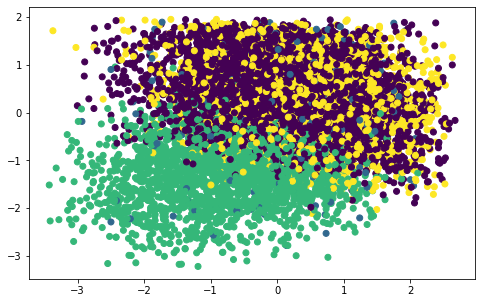

<IPython.core.display.Javascript object>

In [33]:
for k in range(2, 5):
    k_means = KMeans(n_clusters=k, random_state=66)
    k_means.fit(X_std)
    y_pred = k_means.predict(X_std)

    print("Clusters (k) = {k}".format(k=k))
    print(
        "Silhouette score: {sil}, ARI score: {ari}".format(
            sil=metrics.silhouette_score(X, y_pred, metric="euclidean"),
            ari=metrics.adjusted_rand_score(y, y_pred),
        )
    )

    plt.figure(figsize=(8, 5))
    plt.scatter(X_std[:, 0], X_std[:, 1], c=y_pred)
    plt.show()

In [101]:
k_means = KMeans(n_clusters=2, random_state=66)
k_means.fit(X_std)
y_pred = k_means.predict(X_std)

samp_spot["pred"] = y_pred
samp_spot["pred"] = samp_spot["pred"].astype(str)

<IPython.core.display.Javascript object>

In [102]:
samp_spot.groupby("pred").mean().style.background_gradient()

,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
pred,,,,,,,,,,,,,,
0,228800.559028,45.786822,0.632691,0.706415,5.293854,-7.422148,0.694852,0.083543,0.175785,0.023983,0.191461,0.646463,122.768253,3.987536
1,210817.738473,35.348315,0.505177,0.401737,5.001550,-11.648867,0.839597,0.040887,0.571789,0.031301,0.187148,0.474577,113.392944,3.803565


<IPython.core.display.Javascript object>

# Crosstab

In [103]:
pd.crosstab(samp_spot["pred"], samp_spot["genre_label"], normalize="index")

genre_label,blues,classical,country,disco,hip hop,jazz,metal,pop,rock
pred,,,,,,,,,
0,0.056881,0.001213,0.130880,0.07373,0.166195,0.039224,0.044076,0.214449,0.273352
1,0.113522,0.004262,0.186749,0.07594,0.021697,0.103448,0.015885,0.172026,0.306470


<IPython.core.display.Javascript object>

# Scatter plot by cluster

In [99]:
@interact
def scatterplot(x=nums_spot.columns, y=nums_spot.columns, hue=["pred"]):
    colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
    fig = px.scatter(
        x=x,
        y=y,
        color=hue,
        data_frame=samp_spot,
        hover_data=[
            "Performer",
            "Song",
            "genre_label",
            "pred",
            "danceability",
            "energy",
            "speechiness",
        ],
        symbol="pred",
    )
    fig.show()

interactive(children=(Dropdown(description='x', options=('spotify_track_duration_ms', 'spotify_track_popularit…

<IPython.core.display.Javascript object>

# Heriarchical analysis, 1000 rows

In [ ]:
samp = model_df.sample(1000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
links = ["complete", "average", "single"]
affs = ["euclidean", "l1", "l2", "manhattan", "cosine"]

for link in links:
    for aff in affs:
        # Defining the agglomerative clustering
        agg_cluster = AgglomerativeClustering(linkage=link, affinity=aff, n_clusters=3)

        # Fit model
        clusters = agg_cluster.fit_predict(X_std)

        ari = (metrics.adjusted_rand_score(y, clusters),)
        sil = metrics.silhouette_score(X_std, clusters, metric=aff)

        print("Linkage = {link}, Affinity = {aff}".format(link=link, aff=aff))
        print("ARI score: {ari}, Silhouette score: {sil}".format(ari=ari, sil=sil))

In [ ]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(
    linkage="average", affinity="cosine", n_clusters=3
)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[clusters[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
dendrogram(linkage(X_std, method="complete"))
plt.show()

# DBSCAN analysis

In [ ]:
samp = model_df.sample(10000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]
y = y.tolist()

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=3)
clusters = dbscan_cluster.fit_predict(X_std)

print(metrics.silhouette_score(X, clusters))
print(metrics.adjusted_rand_score(y, clusters))

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 40},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

# Gaussian analysis

In [ ]:
samp = model_df.sample(5000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]
y = y.tolist()

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=66)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print(metrics.silhouette_score(X, clusters))
print(metrics.adjusted_rand_score(y, clusters))

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 40},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

# PCA dimension reduction

In [ ]:
samp = model_df.sample(10000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
X = X / 20

y = samp["genre_label"]
y = y.tolist()

In [ ]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X)

In [ ]:
plt.figure(figsize=(10, 8))
colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(
        pca_components[i, 0],
        pca_components[i, 1],
        str(y[i]),
        color=colours[int(y[i])],
        fontdict={"weight": "bold", "size": 30},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

# t-SNE dimension reduction

In [ ]:
samp = model_df.sample(1000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]
y = y.tolist()

In [ ]:
for perp in range(100, 101):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=300)
    tsne_components = tsne.fit_transform(X)

    plt.figure(figsize=(10, 5))
    colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
    for i in range(tsne_components.shape[0]):
        plt.text(
            tsne_components[i, 0],
            tsne_components[i, 1],
            str(y[i]),
            color=colours[int(y[i])],
            fontdict={"weight": "bold", "size": 50},
        )

    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.title("perplexity = " + str(perp))
    plt.show()

# UMAP dimension reduction

In [ ]:
samp = model_df.sample(2000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]
y = y.tolist()

In [ ]:
for neigh in range(5, 10, 2):
    umap_results = umap.UMAP(
        n_neighbors=neigh, min_dist=0.3, metric="correlation"
    ).fit_transform(X)

    plt.figure(figsize=(10, 5))
    colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
    for i in range(umap_results.shape[0]):
        plt.text(
            umap_results[i, 0],
            umap_results[i, 1],
            str(y[i]),
            color=colours[int(y[i])],
            fontdict={"weight": "bold", "size": 50},
        )

    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.title("perplexity = " + str(perp))
    plt.show()

# Music sound files, spectral analysis of those files, coversion of the WAV files into PNG image files.

# --------------------------------------------------------------------------------------------------
# https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
# --------------------------------------------------------------------------------------------------

In [53]:
genre_df = pd.read_csv("data/features_30_sec.csv")

<IPython.core.display.Javascript object>

In [54]:
genre_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


<IPython.core.display.Javascript object>

In [55]:
genre_df.isna().mean()

filename                   0.0
length                     0.0
chroma_stft_mean           0.0
chroma_stft_var            0.0
rms_mean                   0.0
rms_var                    0.0
spectral_centroid_mean     0.0
spectral_centroid_var      0.0
spectral_bandwidth_mean    0.0
spectral_bandwidth_var     0.0
rolloff_mean               0.0
rolloff_var                0.0
zero_crossing_rate_mean    0.0
zero_crossing_rate_var     0.0
harmony_mean               0.0
harmony_var                0.0
perceptr_mean              0.0
perceptr_var               0.0
tempo                      0.0
mfcc1_mean                 0.0
mfcc1_var                  0.0
mfcc2_mean                 0.0
mfcc2_var                  0.0
mfcc3_mean                 0.0
mfcc3_var                  0.0
mfcc4_mean                 0.0
mfcc4_var                  0.0
mfcc5_mean                 0.0
mfcc5_var                  0.0
mfcc6_mean                 0.0
mfcc6_var                  0.0
mfcc7_mean                 0.0
mfcc7_va

<IPython.core.display.Javascript object>

In [56]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

<IPython.core.display.Javascript object>

In [57]:
genre_df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


<IPython.core.display.Javascript object>

In [58]:
nums_gen = genre_df.select_dtypes("number")


@interact
def boxplot(y=nums_gen.columns, hue=["label"]):
    plt.figure(figsize=(15, 8))
    fig = px.box(x="label", y=y, color=hue, data_frame=genre_df.dropna())
    fig.show()

interactive(children=(Dropdown(description='y', options=('length', 'chroma_stft_mean', 'chroma_stft_var', 'rms…

<IPython.core.display.Javascript object>

In [59]:
@interact
def scatterplot(x=nums_gen.columns, y=nums_gen.columns, hue=["label"]):
    plt.figure(figsize=(15, 8))
    fig = px.scatter(x=x, y=y, color=hue, data_frame=genre_df.dropna())
    fig.show()

interactive(children=(Dropdown(description='x', options=('length', 'chroma_stft_mean', 'chroma_stft_var', 'rms…

<IPython.core.display.Javascript object>

# Spectral analysis

In [60]:
#!pip install librosa
import librosa
import librosa.display

<IPython.core.display.Javascript object>

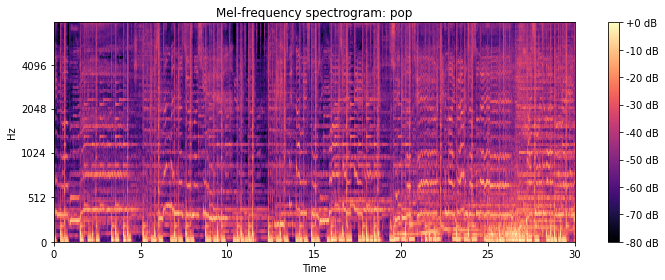

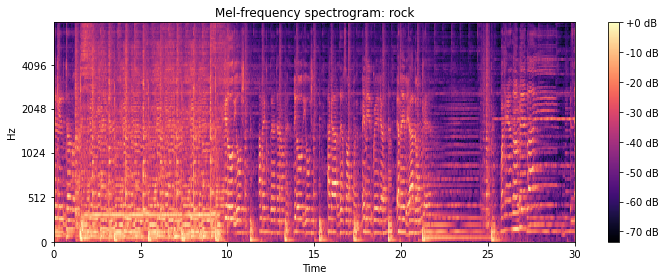

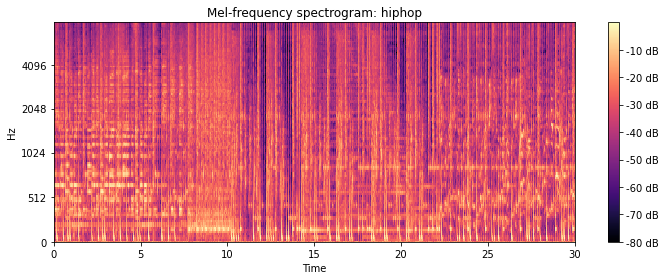

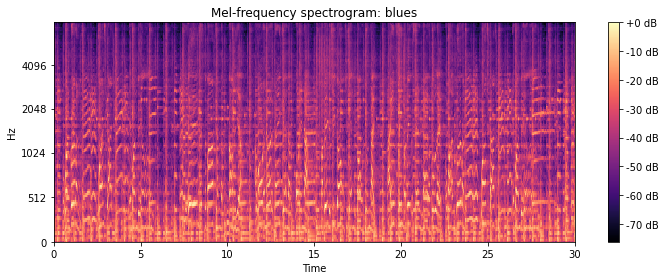

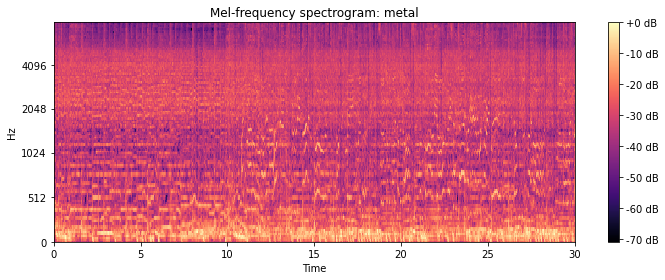

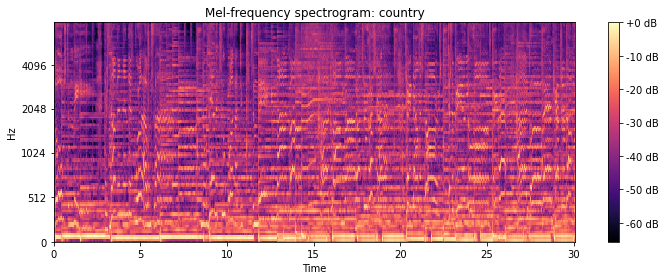

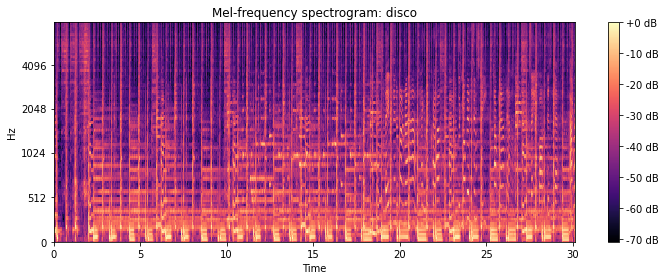

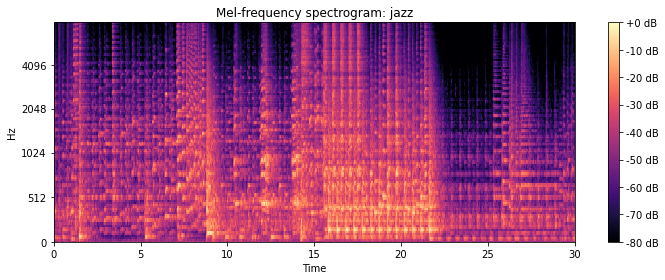

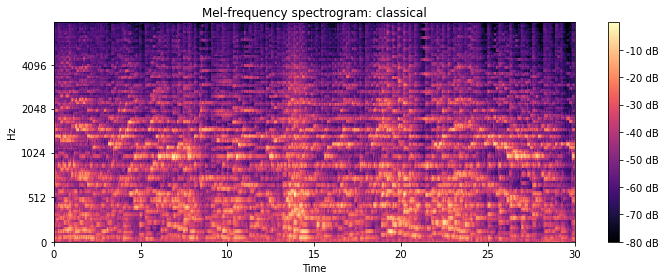

<IPython.core.display.Javascript object>

In [61]:
for genre in genre_list:
    genre = genre.replace(" ", "")
    y, sr = librosa.load(
        "data/genres_original/{genre}/{genre}.00000.wav".format(genre=genre)
    )
    librosa.feature.melspectrogram(y=y, sr=sr)

    D = np.abs(librosa.stft(y)) ** 2
    S = librosa.feature.melspectrogram(S=D, sr=sr)

    # Passing through arguments to the Mel filters
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    plt.figure(figsize=(10, 4))
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sr, fmax=8000)
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel-frequency spectrogram: " + genre)
    plt.tight_layout()
    plt.show()